In [1]:
import pandas as pd
import pickle
import copy
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
import random

# Leitura e pré-processamento dos dados para a criação da matrix de localização

In [2]:
p = 0.1
df = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main_full_jf.csv', index_col=False, sep=';', skiprows=lambda i: i>0 and random.random() > p)
#df.drop(columns={'Unnamed: 0'}, inplace=True)
df.head()

,date,time,user_from,residence_antenna,classe
0,2013-03-21,09:37:27,5C3D4B4FA9E03EB2A8DDC06F5A0A53AB,50721,3
1,2013-03-21,16:32:22,B8D5F372D16DFDDCF3FF80BDF06D988E,50721,3
2,2013-03-21,16:36:28,26263A31ADDBA8D2EA39C3DC70719B13,50721,3
3,2013-03-21,00:06:01,1003EF7C66915A1DF1A20430E9BE302A,50721,3
4,2013-03-21,19:07:05,A6A316DBD51C17276637E402D8C04330,50721,3


In [3]:
df.dropna(subset=['date'], inplace=True)
df['time'] = df['time'].apply(lambda x: str(x))
df['time_range'] = [str(x.split(':')[0]) for x in df['time']]

In [4]:
df['time_range'] = df['time_range'].apply(lambda x: int(x))
df['time_range'].unique()

array([ 9, 16,  0, 19, 20,  7, 21, 11, 13, 18, 12, 17, 14, 15, 10,  8,  5,
        6, 23, 22,  1,  2,  4,  3])

In [5]:
df['DAY_OF_WEEK'] = [datetime.strptime(d, '%Y-%m-%d').strftime('%A') for d in df['date']]
df.head()

,date,time,user_from,residence_antenna,classe,time_range,DAY_OF_WEEK
0,2013-03-21,09:37:27,5C3D4B4FA9E03EB2A8DDC06F5A0A53AB,50721,3,9,Thursday
1,2013-03-21,16:32:22,B8D5F372D16DFDDCF3FF80BDF06D988E,50721,3,16,Thursday
2,2013-03-21,16:36:28,26263A31ADDBA8D2EA39C3DC70719B13,50721,3,16,Thursday
3,2013-03-21,00:06:01,1003EF7C66915A1DF1A20430E9BE302A,50721,3,0,Thursday
4,2013-03-21,19:07:05,A6A316DBD51C17276637E402D8C04330,50721,3,19,Thursday


In [39]:
df.loc[(df['DAY_OF_WEEK'] == 'Saturday') | (df['DAY_OF_WEEK'] == 'Sunday'), 'time_range'] = df['time_range'] + 24

In [6]:
df_1 = df.loc[df['classe'] == 1]
df_2 = df.loc[df['classe'] == 2]
df_3 = df.loc[df['classe'] == 3]
df_4 = df.loc[df['classe'] == 4]
df_5 = df.loc[df['classe'] == 5]
df_6 = df.loc[df['classe'] == 6]
df_7 = df.loc[df['classe'] == 7]


In [44]:
df_2

,date,time,user_from,residence_antenna,classe,time_range,DAY_OF_WEEK
2344,2013-03-21,07:06:23,5EA878FDCF45A8CF3EF75D1860378F9B,51133,2,7,Thursday
2345,2013-03-21,17:00:30,7AFDCC074BAFA48A1257CD46815E7CD3,51133,2,17,Thursday
2346,2013-03-21,13:30:19,BAEBD599098730FA99AEFF22AE9D7E72,51133,2,13,Thursday
2347,2013-03-21,19:37:42,C9CC320F1F4E6B28145DFDC070FE490E,51133,2,19,Thursday
2348,2013-03-21,13:48:01,ABE6D8EA5893006CF491FB3AB80DFE8B,51133,2,13,Thursday
2349,2013-03-21,19:14:20,D9E321771F675EC274BB7D9625FE7AA6,51133,2,19,Thursday
2350,2013-03-21,18:30:11,6C430B13A4D96F66C3CD2A528CFB8A1C,51133,2,18,Thursday
2351,2013-03-21,10:35:51,A12BCA01F2B5DD641FDEF87BF5BF49D6,51133,2,10,Thursday
2352,2013-03-21,17:23:39,8F1C3C386D921196E7A223771E3100D4,51133,2,17,Thursday
2353,2013-03-21,13:57:27,7AFDCC074BAFA48A1257CD46815E7CD3,51133,2,13,Thursday


In [7]:
df_reduced = df[['user_from', 'residence_antenna', 'time_range']]
df_reduced_2 = df_2[['user_from', 'residence_antenna', 'time_range']]
df_reduced_3 = df_3[['user_from', 'residence_antenna', 'time_range']]
df_reduced_4 = df_4[['user_from', 'residence_antenna', 'time_range']]
df_reduced_5 = df_5[['user_from', 'residence_antenna', 'time_range']]

# Criação da matrix de localização

In [13]:
location_matrix = df_reduced.groupby([*df_reduced.columns]).size()
location_matrix

user_from                         residence_antenna  time_range
000008B27F635FC0AFF9BAC21880B796  23612              16            1
0000093420C28302BEF6A7F00486EE1F  50533              8             1
                                                     16            1
                                                     17            1
                                                     18            1
                                                                  ..
FFFF4EADD4E260B816951D49AADA51AD  23513              20            1
                                                     22            1
FFFFEC8E8885572E9EC37464788BFB8E  51471              12            1
                                                     13            1
                                                     17            1
Length: 775560, dtype: int64

In [9]:
location_matrix = df_reduced.groupby([*df_reduced.columns]).size()
location_matrix = location_matrix.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

location_matrix_2 = df_reduced_2.groupby([*df_reduced_2.columns]).size()
location_matrix_2 = location_matrix_2.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

MemoryError: Unable to allocate 2.79 GiB for an array with shape (258746, 1446) and data type float64

In [ ]:
location_matrix_3 = df_reduced_3.groupby([*df_reduced_3.columns]).size()
location_matrix_3 = location_matrix_3.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

location_matrix_4 = df_reduced_4.groupby([*df_reduced_2.columns]).size()
location_matrix_4 = location_matrix_4.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

location_matrix_5 = df_reduced_5.groupby([*df_reduced_3.columns]).size()
location_matrix_5 = location_matrix_5.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

# Vetores de trajetória

In [23]:
trajectory_vector = location_matrix.groupby(['USER_FROM']).sum()
trajectory_vector_2 = location_matrix_2.groupby(['USER_FROM']).sum()
trajectory_vector_3 = location_matrix_3.groupby(['USER_FROM']).sum()

# Similaridade entre os vetores

In [24]:
import scipy.spatial.distance as ssd
import numpy as np

In [25]:
trajectory_vector_array = trajectory_vector.to_numpy()

In [26]:
file = open('/home/gustavo/Desktop/Mestrado/mestrado_dados/Arquivos_Pickle/dict_edges.pkl', 'rb')
dict_edge = pickle.load(file)

In [27]:
dict_edge

{('5B5F2C071D12AF13219DF5EBE05132AF',
  '12AF4F1B84D5D9BD67FABD71228362A0'): {'num_calls': 15, 'duration': 27.529999999999998},
 ('5B5F2C071D12AF13219DF5EBE05132AF',
  'BFEA16F2EB65F3045AB6C1D8B2B9982B'): {'num_calls': 15, 'duration': 60.82999999999999},
 ('5B5F2C071D12AF13219DF5EBE05132AF',
  '06F616404C88398745B39F2E55E2654B'): {'num_calls': 3, 'duration': 3.32},
 ('5B5F2C071D12AF13219DF5EBE05132AF',
  '3F4B1658DFD0D51A976D67016C820452'): {'num_calls': 6,
  'duration': 4.5200000000000005},
 ('5B5F2C071D12AF13219DF5EBE05132AF',
  'B2F0912C81CE4377106C945A8AF32D0A'): {'num_calls': 26, 'duration': 8.780000000000001},
 ('5B5F2C071D12AF13219DF5EBE05132AF',
  '6775BBE095A159AE52D2B76A18EC5045'): {'num_calls': 38, 'duration': 25.659999999999997},
 ('5B5F2C071D12AF13219DF5EBE05132AF',
  '6735DDFD8C46097C6A15FA28D926E98E'): {'num_calls': 3, 'duration': 1.07},
 ('5B5F2C071D12AF13219DF5EBE05132AF',
  'D06608F16BF6F9A6DFB793ED52B7FD66'): {'num_calls': 3, 'duration': 5.67},
 ('5B5F2C071D12AF13219

In [28]:
len(dict_edge)

297427

In [29]:
def calculate_cosine_similarity(t_v, dict_edge):
    to_remove_dict = {}
    for key in dict_edge.keys():
        for k in key:
            if k in t_v.index:
                pass
            else:
                to_remove_dict[key] = dict_edge[key]
    tuples = set(dict_edge).difference(to_remove_dict)
    new_dict = {}
    for i in tuples:
        new_dict[i] = dict_edge[i]
    for key, value in zip(new_dict.keys(), new_dict.values()):
        x = t_v.loc[key[0]].to_numpy()
        y = t_v.loc[key[1]].to_numpy()
        cosine = 1 - ssd.cosine(x,y)
        value['Cosine_Similarity'] = cosine
    return new_dict

In [30]:
dt_geral = calculate_cosine_similarity(trajectory_vector, dict_edge)
dt_2 = calculate_cosine_similarity(trajectory_vector_2, dict_edge)
dt_3 = calculate_cosine_similarity(trajectory_vector_3, dict_edge)

In [31]:
t_v_2 = trajectory_vector_2.copy()
t_v_2['class'] = 2

t_v_3 = trajectory_vector_3.copy()
t_v_3['class'] = 3

t_v = t_v_3.append(t_v_2)
t_v

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2,class
USER_FROM,,,,,,,,,,,,,
00003F26576D1122848B6F3CEEC250E5,0,0,0,0,0,0,0,12,0,0,0,0,3
0008B8E32E18BF4450B7CAAF0C1CE179,0,0,0,27,0,0,0,0,0,0,0,0,3
000A16372A762FD3BB2A59334780CDEA,0,0,0,9,2,0,0,0,0,0,0,0,3
000D1DF8B25B4C1728D16E1510BC72BE,0,0,0,0,0,0,0,22,0,0,0,0,3
000DDDA8D62CC0A09B505AA27279CCF8,0,0,0,13,0,0,0,0,0,0,0,0,3
000FBBADF9577F339DF263FD628D897C,0,0,0,0,0,0,23,0,0,0,0,0,3
000FEF29098C6C17FDE52CF7B3AD30A1,0,0,0,0,0,48,0,0,0,0,0,0,3
0014D12E96959533E7BBB4B574635B83,0,0,0,21,0,0,2,0,0,0,0,0,3
0015CBC1C07094CDFBE79A52AAF12FD5,0,0,0,0,0,42,0,0,0,0,0,0,3


In [32]:
from itertools import chain
def dict_union(*args):
    return dict(chain.from_iterable(d.items() for d in args))

dicts = dict_union(dt_geral, dt_2, dt_3)

In [33]:
for k, v in dicts.items():
    v['class_node_1'] = t_v['class'][list(k)[0]]
    v['class_node_2'] = t_v['class'][list(k)[1]]

In [34]:
df_similarity_num_calls = pd.DataFrame.from_dict(dicts, orient='index').reset_index()
df_similarity_num_calls.rename(columns={'level_0': 'Node_1', 'level_1': 'Node_2'}, inplace=True)
df_similarity_num_calls.sample(5)

,Node_1,Node_2,num_calls,duration,Cosine_Similarity,class_node_1,class_node_2
10538,97A9F199D887F5DFFD08352597C0ADAC,71AE68C66EF504256DE6574242494D07,3,7.39,0.000000,3,2
6585,520551672660D51A2F5E15CED49D1101,4BC3851DDC504A5F1CB9E8B217B2729E,6,4.63,0.098735,2,2
4637,08A65ABE0D6322D723E59D9FDC4A4163,E179870DBA0AB194B194C2B8D07C8F82,14,2.06,1.000000,2,2
18400,91F66C4480BCC1B25B64A4E85D546C77,3AB965E823973952DB4AA2FF756AAC0B,3,1.10,0.113505,3,3
19693,2A3F1DFE4042BA8BBB897FDA9B3C4A88,49A8BB4099153C9255123B2788C6737C,3,11.18,1.000000,3,3


In [38]:
df_2_and_all = df_similarity_num_calls.loc[df_similarity_num_calls['class_node_1'] == 2]
df_2_and_2 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 2) & 
                                         (df_similarity_num_calls['class_node_2'] == 2)]
df_2_and_3 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 2) & 
                                         (df_similarity_num_calls['class_node_2'] == 3)]

df_3_and_all = df_similarity_num_calls.loc[df_similarity_num_calls['class_node_1'] == 3]
df_3_and_2 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 3) & 
                                         (df_similarity_num_calls['class_node_2'] == 2)]
df_3_and_3 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 3) & 
                                         (df_similarity_num_calls['class_node_2'] == 3)]

In [42]:
df_2_and_2.head()

,Node_1,Node_2,num_calls,duration,Cosine_Similarity,class_node_1,class_node_2
3,B8DDA45AB12754B69C6C982D28A81395,1D5F463CF8593B1A6FE1DC315D490DF9,4,2.99,0.997054,2,2
6,699E8516AE66E4CA6746DD7A74D6E2B6,D89DA68BE8E81706C3E2FC4893F6F726,7,2.30,1.000000,2,2
14,A39ABE8167AEFA4CCB626C97DE015BC0,29FD4F9A516BA8A7A556140415A35267,3,1.43,1.000000,2,2
18,2F693B5AE4B097089F19BFD1E03F3791,FBF0BBE5E38903257F067893BF52D5CF,3,1.11,1.000000,2,2
20,9D73DBE77832F409A4167DE843B81454,FC4240B547F79D401B37710F9B127C9A,8,9.53,0.999568,2,2


In [44]:
def sort_dataframes(dfs):
    new_df = []
    for df in dfs:
        df = df.groupby(['Cosine_Similarity','num_calls']).first().reset_index()
        df = df.sort_values(by=['num_calls', 'Cosine_Similarity'])
        new_df.append(df)
    return new_df
df = sort_dataframes([df_2_and_2,df_2_and_3,df_2_and_all,df_3_and_2, df_3_and_3, df_3_and_all])

In [46]:
df_new = []
for d in df:
    df_new.append(d.groupby('num_calls').mean().reset_index())

In [47]:
df_new[0]

,num_calls,Cosine_Similarity,duration,class_node_1,class_node_2
0,3,0.909056,3.334142,2,2
1,4,0.892116,3.877492,2,2
2,5,0.902693,5.280317,2,2
3,6,0.918422,6.129062,2,2
4,7,0.925822,5.584103,2,2
5,8,0.919007,7.133263,2,2
6,9,0.907579,10.060435,2,2
7,10,0.927106,11.325208,2,2
8,11,0.924629,12.111795,2,2
9,12,0.901757,13.982553,2,2


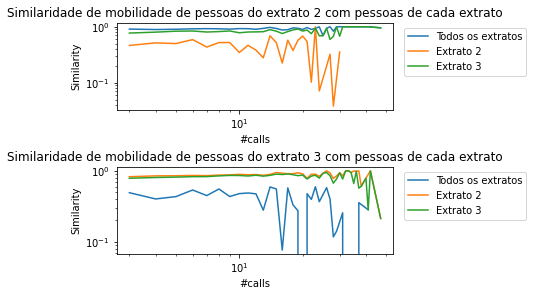

In [51]:
x1 = df_new[0]['num_calls'].to_numpy()
y1 = df_new[0]['Cosine_Similarity'].to_numpy()

x2 = df_new[1]['num_calls'].to_numpy()
y2 = df_new[1]['Cosine_Similarity'].to_numpy()

x3 = df_new[2]['num_calls'].to_numpy()
y3 = df_new[2]['Cosine_Similarity'].to_numpy()

_x1 = df_new[3]['num_calls'].to_numpy()
_y1 = df_new[3]['Cosine_Similarity'].to_numpy()

_x2 = df_new[4]['num_calls'].to_numpy()
_y2 = df_new[4]['Cosine_Similarity'].to_numpy()

_x3 = df_new[5]['num_calls'].to_numpy()
_y3 = df_new[5]['Cosine_Similarity'].to_numpy()

fig, (ax1, ax2) = plt.subplots(2,1, constrained_layout=True)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')

ax1.plot(x1, y1, label='Todos os extratos')
ax1.plot(x2, y2, label='Extrato 2')
ax1.plot(x3, y3, label='Extrato 3')

ax1.set_xlabel('#calls')
ax1.set_ylabel('Similarity')

ax1.set_title('Similaridade de mobilidade de pessoas do extrato 2 com pessoas de cada extrato')
ax1.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

ax2.plot(_x1, _y1, label='Todos os extratos')
ax2.plot(_x2, _y2, label='Extrato 2')
ax2.plot(_x3, _y3, label='Extrato 3')

ax2.set_xlabel('#calls')
ax2.set_ylabel('Similarity')

ax2.set_title('Similaridade de mobilidade de pessoas do extrato 3 com pessoas de cada extrato')
ax2.legend(loc="upper right", bbox_to_anchor=(1.5, 1))


plt.show()

In [31]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

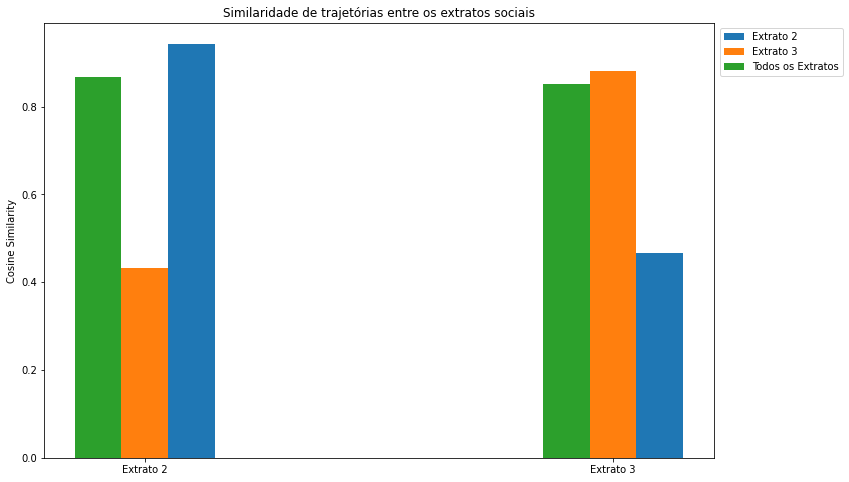

In [36]:
labels = ['Extrato 2', 'Extrato 3']

x = np.arange(len(labels))
width = 1

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x + 0.1, [np.mean(y1), np.mean(_y1)], width/10, label='Extrato 2')
rects2 = ax.bar(x, [np.mean(y2), np.mean(_y2)], width/10, label='Extrato 3')
rects3 = ax.bar(x - 0.1, [np.mean(y3), np.mean(_y3)], width/10, label='Todos os Extratos')

ax.set_ylabel('Cosine Similarity')
ax.set_title('Similaridade de trajetórias entre os extratos sociais')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.2, 1))

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()